In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/stock_data.csv",parse_dates=True, index_col="Date")
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [16]:
df.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2014-12-23,51.46,51.46,49.93,50.02,15514036,AABA
2014-12-24,50.19,50.92,50.19,50.65,5962870,AABA
2014-12-26,50.65,51.06,50.61,50.86,5170048,AABA
2014-12-29,50.67,51.01,50.51,50.53,6624489,AABA
2014-12-30,50.35,51.27,50.35,51.22,10703455,AABA


In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

<Axes: xlabel='Date'>

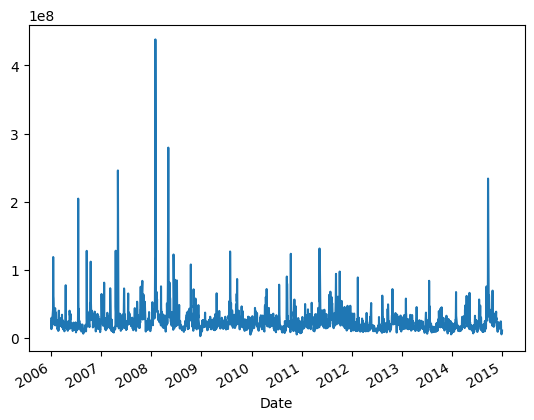

In [11]:
df['Volume'].plot()

<Axes: xlabel='Date'>

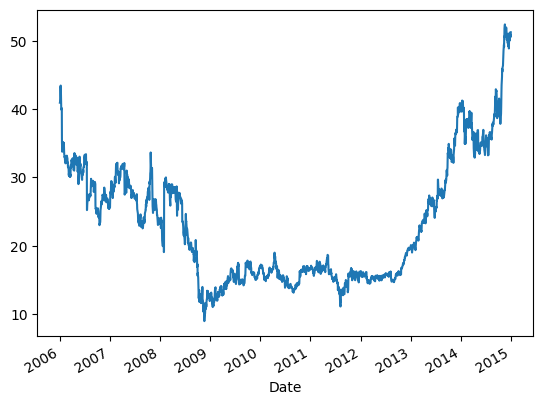

In [15]:
df['Close'].plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

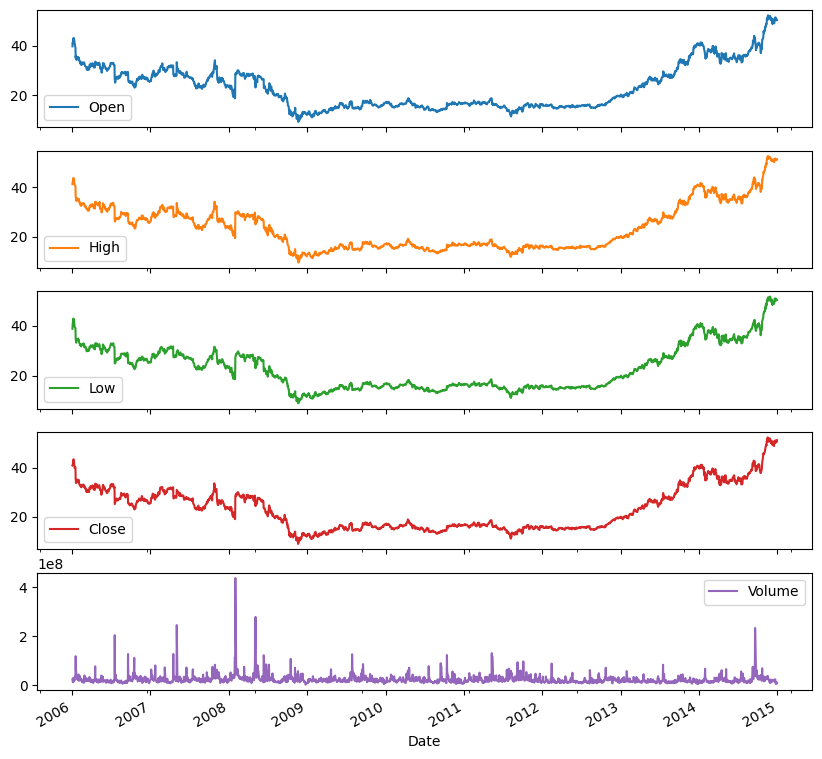

In [19]:
df.plot(subplots=True, figsize=(10,10))

<Axes: xlabel='Date'>

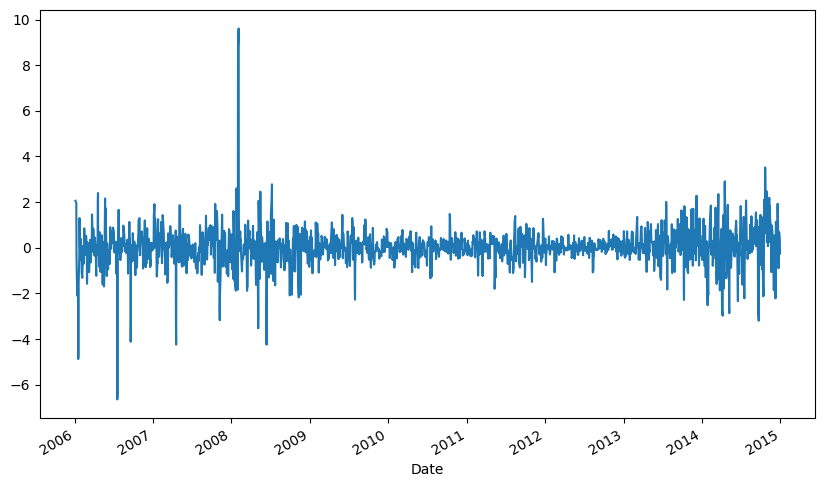

In [20]:
df.Low.diff(2).plot(figsize=(10, 6))

<Axes: xlabel='Date'>

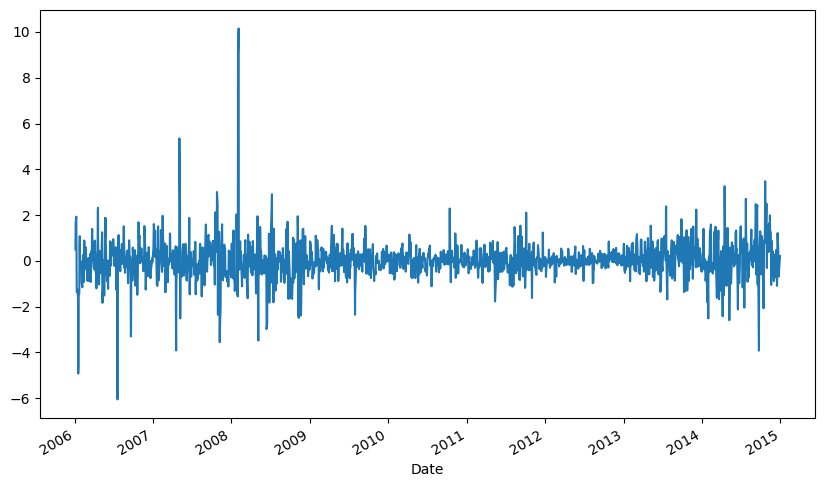

In [21]:
df.High.diff(2).plot(figsize=(10, 6))

<Axes: xlabel='Date'>

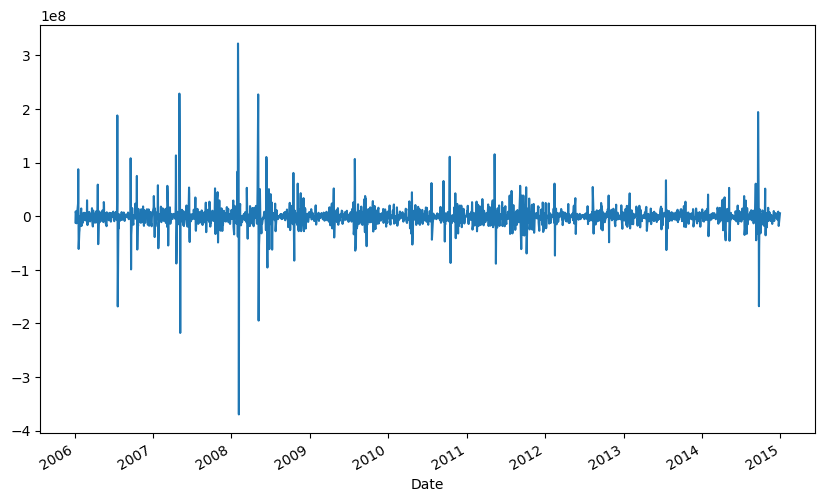

In [22]:
df.Volume.diff(2).plot(figsize=(10, 6))

In [26]:
df['Change'] = df.Close.div(df.Close.shift())
df['Change'].plot(figsize=(100, 100), fontsize=96)

Output hidden; open in https://colab.research.google.com to view.

In [36]:
d1=[1,2,3,4]
d=pd.DataFrame(d1,index=['ONE','TWO','THREE','FOUR'],columns=['COLUMN_1'])
d

,COLUMN_1
ONE,1
TWO,2
THREE,3
FOUR,4


from matplotlib import pyplot as plt
d['COLUMN_1'].plot(kind='hist', bins=20, title='COLUMN_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['COLUMN_1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'COLUMN_1'}, axis=1)
              .sort_values('COLUMN_1', ascending=True))
  xs = counted['COLUMN_1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = d.sort_values('COLUMN_1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('COLUMN_1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
d['COLUMN_1'].plot(kind='line', figsize=(8, 4), title='COLUMN_1')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
d['Change'] = d.COLUMN_1.div(df.Close.shift())
d

,COLUMN_1,Change
ONE,1,NaN
TWO,2,NaN
THREE,3,NaN
FOUR,4,NaN


from matplotlib import pyplot as plt
d['COLUMN_1'].plot(kind='hist', bins=20, title='COLUMN_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['COLUMN_1']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'COLUMN_1'}, axis=1)
              .sort_values('COLUMN_1', ascending=True))
  xs = counted['COLUMN_1']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = d.sort_values('COLUMN_1', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('COLUMN_1')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
d['COLUMN_1'].plot(kind='line', figsize=(8, 4), title='COLUMN_1')
plt.gca().spines[['top', 'right']].set_visible(False)

# IMPLEMENT RESAMPLING TECHNIQUE FOR STOCK MARKET DATASET

In [54]:
resampled_data = df.Open.resample('M').mean()
resampled_data[:12]

Date
2006-01-31    38.245500
2006-02-28    33.141579
2006-03-31    31.333478
2006-04-30    32.383684
2006-05-31    31.744545
2006-06-30    31.005455
2006-07-31    29.893500
2006-08-31    28.064348
2006-09-30    27.481000
2006-10-31    24.528636
2006-11-30    26.993810
2006-12-31    26.371500
Freq: M, Name: Open, dtype: float64